# Entraîner un réseau de neurones profond

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math 

%load_ext tensorboard
import os

np.random.seed(42)

2023-03-10 17:56:04.877349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 17:56:05.053277: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-10 17:56:05.053302: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-10 17:56:06.196638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

L'objectif de cette activité guidée est de construire un réseau profond et d'implémenter les techniques d'optimisation suivante :    
- batch normalization
- He initialization
- adam optimization
- le dropout

Vous avez le choix entre l'API fonctionnelle ou séquentielle.

Quelques ressources utiles :    

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

https://towardsdatascience.com/gentle-introduction-to-selus-b19943068cd9

https://keras.io/api/optimizers/Nadam/

https://keras.io/api/layers/regularization_layers/alpha_dropout/

## 1 
*Construire un réseau profond de 20 couches et de 100 neurones chacun. (le réseau est trop grand par rapport aux données disponibles et la tâche mais c'est justement le but de l'exercice) Utiliser l'initialisation He et la fonction d'activation RELU*

- Charger le jeu de données avec la commande suivante : keras.datasets.fashion_mnist.load_data(). Le jeu de données est composée de 60000 images (50000 pour l'entraînement et 10000 pour le test) en 28x28 avec 10 classes. Sélectionner 10% du jeu de données d'entraînement pour la validation.
- Utiliser le Nadam optimization et l'early stopping. (effectuer une veille)
- Implémenter les callbacks suivants :  ModelCheckpoint, EarlyStopping, TensorBoard
- Utiliser l'accuracy comme métrique
- Choisir une fonction coût adaptée
- Entraîner votre réseau de neurones

### Codez ici

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
def map_label(label):
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return label_names[label]
mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
# n_rows = 4
# n_cols = 10
# plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
# for row in range(n_rows):
#     for col in range(n_cols):
#         index = n_cols * row + col
#         plt.subplot(n_rows, n_cols, index + 1)
#         plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
#         plt.axis('off')
#         plt.title(map_label(y_train[index]), fontsize=12)
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
# plt.show()

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
initializer = tf.keras.initializers.HeNormal(seed=42)
regularisateur = tf.keras.regularizers.L2(l2=1e-4)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for i in range(0,4):
  model.add(keras.layers.Dense(200, activation="relu",kernel_initializer=initializer,kernel_regularizer=regularisateur))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

In [ ]:
opt = keras.optimizers.Nadam(learning_rate=0.0001)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),batch_size=32,
                    callbacks=my_callbacks)

Epoch 1/100
1719/1719 [==============================] - 29s 12ms/step - loss: 1.7378 - accuracy: 0.4507 - val_loss: 0.8150 - val_accuracy: 0.7450
Epoch 2/100
1719/1719 [==============================] - 21s 12ms/step - loss: 1.0524 - accuracy: 0.6686 - val_loss: 0.6569 - val_accuracy: 0.8066
Epoch 3/100
1719/1719 [==============================] - 21s 12ms/step - loss: 0.8998 - accuracy: 0.7275 - val_loss: 0.5864 - val_accuracy: 0.8356
Epoch 4/100
1719/1719 [==============================] - 21s 12ms/step - loss: 0.7990 - accuracy: 0.7642 - val_loss: 0.5555 - val_accuracy: 0.8462
Epoch 5/100
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7338 - accuracy: 0.7884 - val_loss: 0.5216 - val_accuracy: 0.8548
Epoch 6/100
1719/1719 [==============================] - 21s 12ms/step - loss: 0.6986 - accuracy: 0.8010 - val_loss: 0.5018 - val_accuracy: 0.8650
Epoch 7/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.6697 - accuracy: 0.8111 - val_loss: 0

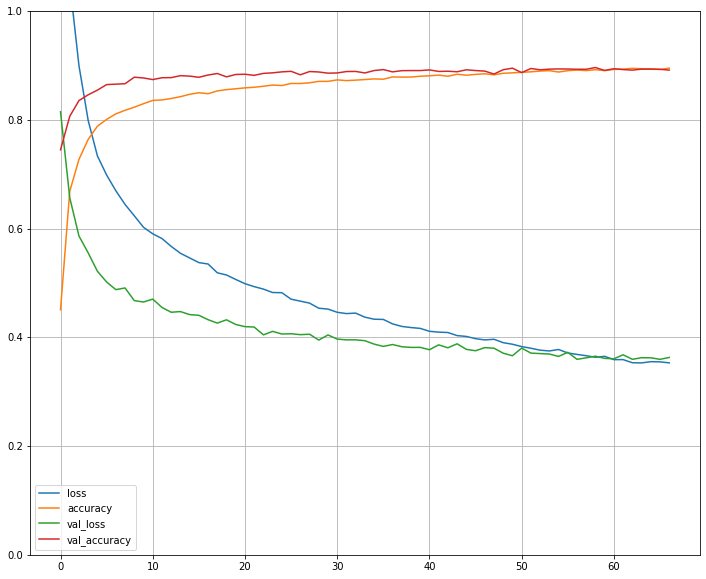

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3934 - accuracy: 0.8837


[0.3934285342693329, 0.8837000131607056]

- Quel est votre score sur le test ?
- Combien d'epochs a-t'il fallu pour converger vers une bonne solution ?

## 2

Ajouter la batch Normalization et comparer les courbes d'apprentissage.
- Est-ce que ça converge plus rapidement qu'avant ?
- Le modèle est-il plus performant ?
- Quel est la durée de chaque epoch ?


In [ ]:
# Codez ici

## 3

Régulariser le modèle avec le dropout

In [ ]:
# Codez ici

## Bonus : Créer votre propre architecture personnalisée

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math 

%load_ext tensorboard
import os

np.random.seed(42)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [30]:
def map_label(label):
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return label_names[label]
mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [40]:
from sklearn.preprocessing import StandardScaler

X_train = X_train.reshape(-1,784)
X_valid = X_valid.reshape(-1,784)
X_test = X_test.reshape(-1,784)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [51]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

In [52]:
initializer = tf.keras.initializers.HeNormal(seed=42)
regularisateur = tf.keras.regularizers.L1L2(l1=1e-5,l2=1e-4)


In [53]:
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))

for i in range(0,1):
  model.add(keras.layers.Dense(256, activation="relu",kernel_initializer=initializer,kernel_regularizer=regularisateur,bias_regularizer=regularisateur))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.35))

  model.add(keras.layers.Dense(128, activation="relu",kernel_initializer=initializer,kernel_regularizer=regularisateur,bias_regularizer=regularisateur))
  model.add(keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.15))



model.add(keras.layers.Dense(10, activation="softmax"))

In [54]:
model.build((1,784))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 256)                  200960    
                                                                 
 batch_normalization (BatchN  (1, 256)                 1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (1, 256)                  0         
                                                                 
 dense_1 (Dense)             (1, 128)                  32896     
                                                                 
 batch_normalization_1 (Batc  (1, 128)                 512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (1, 128)                  0

In [56]:
opt = keras.optimizers.Nadam(learning_rate=0.005)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True),
    
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
#tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}.h5'),
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [58]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),batch_size=32,
                    callbacks=my_callbacks)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7476 - accuracy: 0.8186 - val_loss: 0.6451 - val_accuracy: 0.8524
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7292 - accuracy: 0.8188 - val_loss: 0.6402 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6964 - accuracy: 0.8213 - val_loss: 0.5984 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6773 - accuracy: 0.8233 - val_loss: 0.5620 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6582 - accuracy: 0.8248 - val_loss: 0.5675 - val_accuracy: 0.8500
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6548 - accuracy: 0.8270 - val_loss: 0.5632 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6485 - accuracy: 0.8272 - val_loss: 0.5633 - val_accuracy:

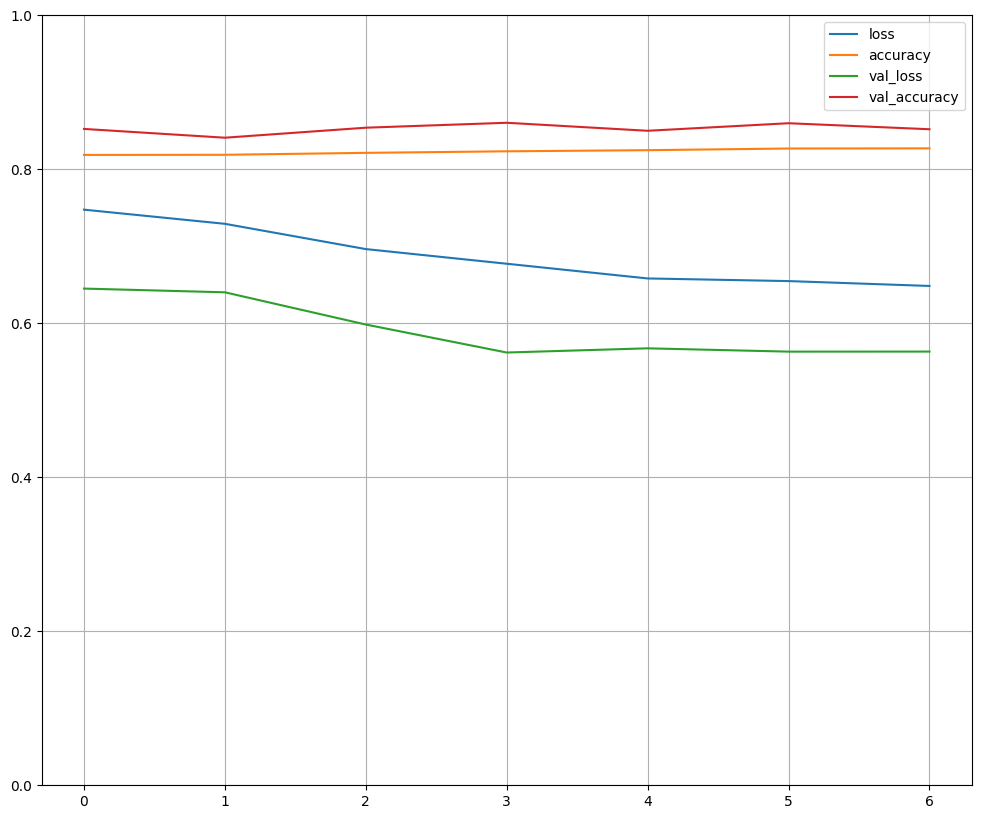

In [59]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.8416


[0.603425920009613, 0.8416000008583069]

In [ ]:
# model.save("/content/drive/My Drive/Colab Notebooks/my_keras_model.h5")

## Bonus : Comparer vos résultats avec une régression logistique

In [88]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math 

%load_ext tensorboard
import os

np.random.seed(42)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [139]:
def map_label(label):
    label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return label_names[label]
mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)

In [148]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,(8,8),input_shape=(28,28,1), activation="relu"))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))

model.add(keras.layers.Dense(10, activation="softmax"))

In [149]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 64)        4160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                51232     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                          

In [150]:
opt = keras.optimizers.Nadam(learning_rate=0.005)
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [155]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),batch_size=32,
                    callbacks=my_callbacks)

Epoch 1/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2603 - accuracy: 0.9058 - val_loss: 0.2468 - val_accuracy: 0.9094
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2476 - accuracy: 0.9106 - val_loss: 0.2732 - val_accuracy: 0.9078
Epoch 3/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2387 - accuracy: 0.9146 - val_loss: 0.2575 - val_accuracy: 0.9038


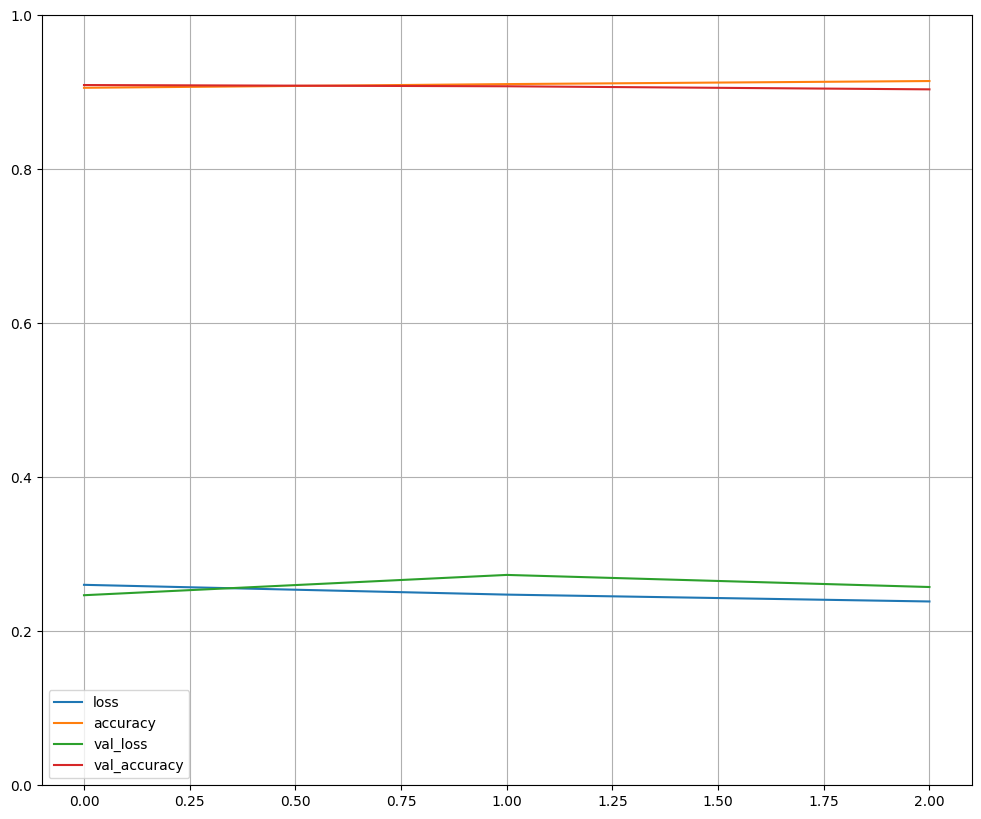

In [156]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [157]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2775 - accuracy: 0.9001


[0.2775159776210785, 0.9000999927520752]

In [154]:
# Codez ici